<a href="https://colab.research.google.com/github/GiacomoMM/blood-cell-classification-detection/blob/main/Progetto_LabIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
import torch
import torchvision

#Data download

In [3]:
import requests
import zipfile
from pathlib import Path

data_path=Path("data/")
#se ci sono gia i dati
if data_path.is_dir():
  print("directory esiste già")
else:
  data_path.mkdir(parents=True,exist_ok=True)
  print("directory data creata")

with open(data_path / "PBC_dataset_normal_DIB_224.zip","wb") as f:
  request=requests.get("https://github.com/GiacomoMM/blood-cell-classification-detection/raw/main/PBC_dataset_normal_DIB_224.zip?download=")
  print("downloading dataset")
  f.write(request.content)

with zipfile.ZipFile(data_path / "PBC_dataset_normal_DIB_224.zip","r") as zip_f:
  print("unzipping dataset")
  zip_f.extractall(data_path)


directory data creata
downloading dataset
unzipping dataset


In [4]:
import os
def directory(dir_path):
  for dirpath,dirname,filename in os.walk(dir_path):
    print(f"Ci sono {len(dirname)} directory e {len(filename)} immagini in {dirpath}")

In [5]:
directory(data_path)

Ci sono 1 directory e 1 immagini in data
Ci sono 8 directory e 0 immagini in data/PBC_dataset_normal_DIB_224
Ci sono 0 directory e 1551 immagini in data/PBC_dataset_normal_DIB_224/erythroblast
Ci sono 0 directory e 3117 immagini in data/PBC_dataset_normal_DIB_224/eosinophil
Ci sono 0 directory e 3329 immagini in data/PBC_dataset_normal_DIB_224/neutrophil
Ci sono 0 directory e 2895 immagini in data/PBC_dataset_normal_DIB_224/ig
Ci sono 0 directory e 2348 immagini in data/PBC_dataset_normal_DIB_224/platelet
Ci sono 0 directory e 1218 immagini in data/PBC_dataset_normal_DIB_224/basophil
Ci sono 0 directory e 1214 immagini in data/PBC_dataset_normal_DIB_224/lymphocyte
Ci sono 0 directory e 1420 immagini in data/PBC_dataset_normal_DIB_224/monocyte


#Analisi Dati

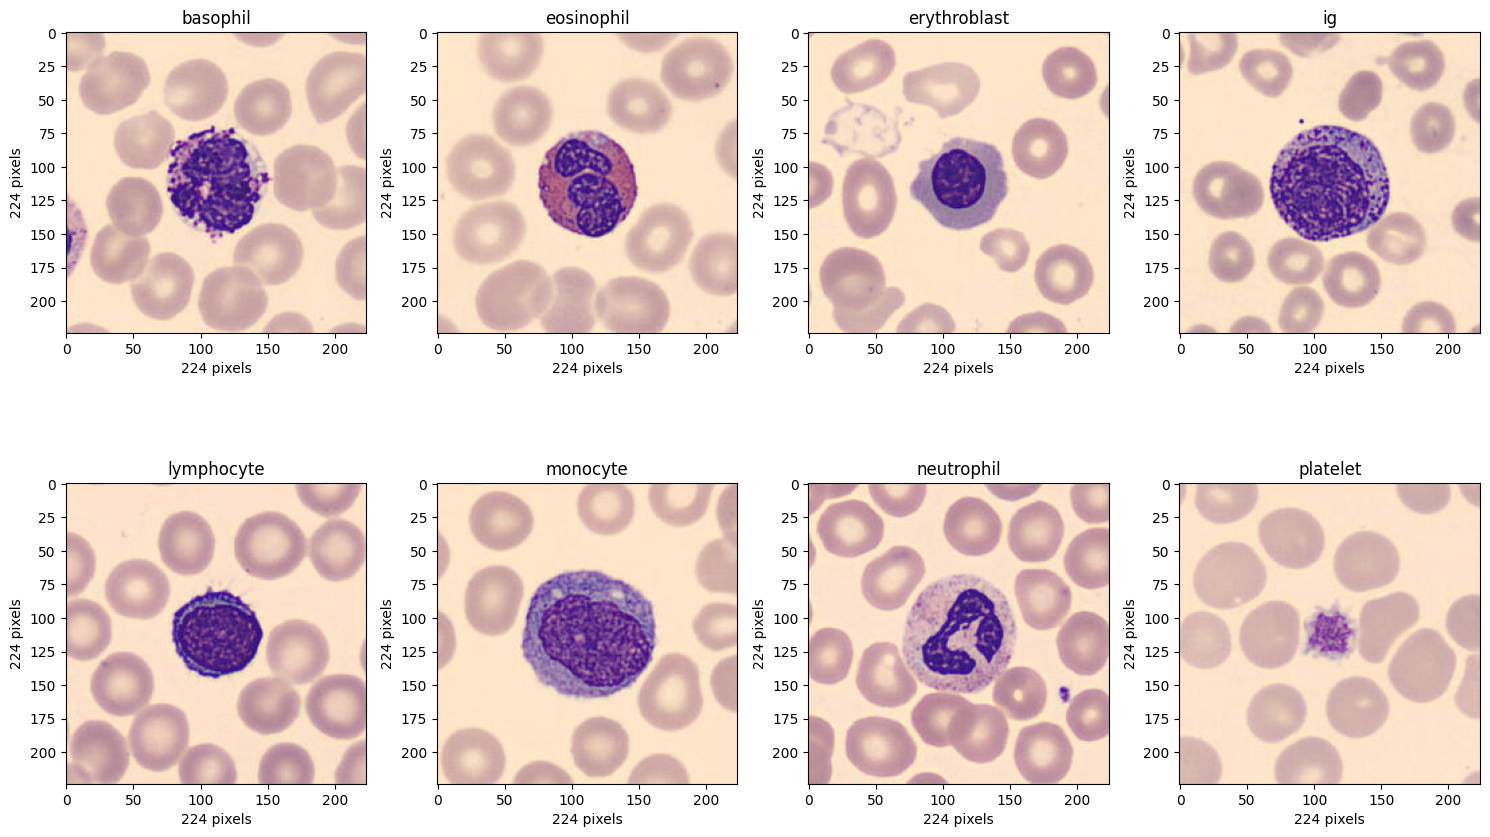

In [6]:
import random
from PIL import Image
import matplotlib.pyplot as plt

lista_path=list()
lista_classi=list()

image_basophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/basophil/")
image_basophil_path_list= list(image_basophil_path.glob("*.jpg"))
random_image_basophil_path=random.choice(image_basophil_path_list)
#image_basophil=Image.open(random_image_basophil_path)
lista_classi.append(random_image_basophil_path.parent.stem)
lista_path.append(random_image_basophil_path)

image_eosinophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/eosinophil/")
image_eosinophil_path_list= list(image_eosinophil_path.glob("*.jpg"))
random_image_eosinophil_path=random.choice(image_eosinophil_path_list)
#image_eosinophil=Image.open(random_image_eosinophil_path)
lista_classi.append(random_image_eosinophil_path.parent.stem)
lista_path.append(random_image_eosinophil_path)

image_erythroblast_path=Path("/content/data/PBC_dataset_normal_DIB_224/erythroblast/")
image_erythroblast_path_list= list(image_erythroblast_path.glob("*.jpg"))
random_image_erythroblast_path=random.choice(image_erythroblast_path_list)
#image_erythroblast=Image.open(random_image_erythroblast_path)
lista_classi.append(random_image_erythroblast_path.parent.stem)
lista_path.append(random_image_erythroblast_path)

image_ig_path=Path("/content/data/PBC_dataset_normal_DIB_224/ig/")
image_ig_path_list= list(image_ig_path.glob("*.jpg"))
random_image_ig_path=random.choice(image_ig_path_list)
#image_ig=Image.open(random_image_ig_path)
lista_classi.append(random_image_ig_path.parent.stem)
lista_path.append(random_image_ig_path)

image_lymphocyte_path=Path("/content/data/PBC_dataset_normal_DIB_224/lymphocyte/")
image_lymphocyte_path_list= list(image_lymphocyte_path.glob("*.jpg"))
random_image_lymphocyte_path=random.choice(image_lymphocyte_path_list)
#image_lymphocyte=Image.open(random_image_lymphocyte_path)
lista_classi.append(random_image_lymphocyte_path.parent.stem)
lista_path.append(random_image_lymphocyte_path)

image_monocyte_path=Path("/content/data/PBC_dataset_normal_DIB_224/monocyte/")
image_monocyte_path_list= list(image_monocyte_path.glob("*.jpg"))
random_image_monocyte_path=random.choice(image_monocyte_path_list)
#image_monocyte=Image.open(random_image_monocyte_path)
lista_classi.append(random_image_monocyte_path.parent.stem)
lista_path.append(random_image_monocyte_path)

image_neutrophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/neutrophil/")
image_neutrophil_path_list= list(image_neutrophil_path.glob("*.jpg"))
random_image_neutrophil_path=random.choice(image_neutrophil_path_list)
#image_neutrophil=Image.open(random_image_neutrophil_path)
lista_classi.append(random_image_neutrophil_path.parent.stem)
lista_path.append(random_image_neutrophil_path)

image_platelet_path=Path("/content/data/PBC_dataset_normal_DIB_224/platelet/")
image_platelet_path_list= list(image_platelet_path.glob("*.jpg"))
random_image_platelet_path=random.choice(image_platelet_path_list)
#image_platelet=Image.open(random_image_platelet_path)
lista_classi.append(random_image_platelet_path.parent.stem)
lista_path.append(random_image_platelet_path)


plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(15,15))

for i in range(8):
  image =Image.open(lista_path[i])
  ax = axs[i // 4, i % 4]
  ax.imshow(image)
  ax.set_title(f"{lista_classi[i]}")
  width, height = image.size
  ax.set_xlabel(f"{width} pixels")
  ax.set_ylabel(f"{height} pixels")

plt.tight_layout(h_pad=-26.0)
plt.show()


In [7]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

dataset = ImageFolder(root="/content/data/PBC_dataset_normal_DIB_224", transform=transform, allow_empty=False)
print(dataset.classes)
print(dataset.class_to_idx)
print(f"Numero totale di immagini: {len(dataset)}")


['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']
{'basophil': 0, 'eosinophil': 1, 'erythroblast': 2, 'ig': 3, 'lymphocyte': 4, 'monocyte': 5, 'neutrophil': 6, 'platelet': 7}
Numero totale di immagini: 17092


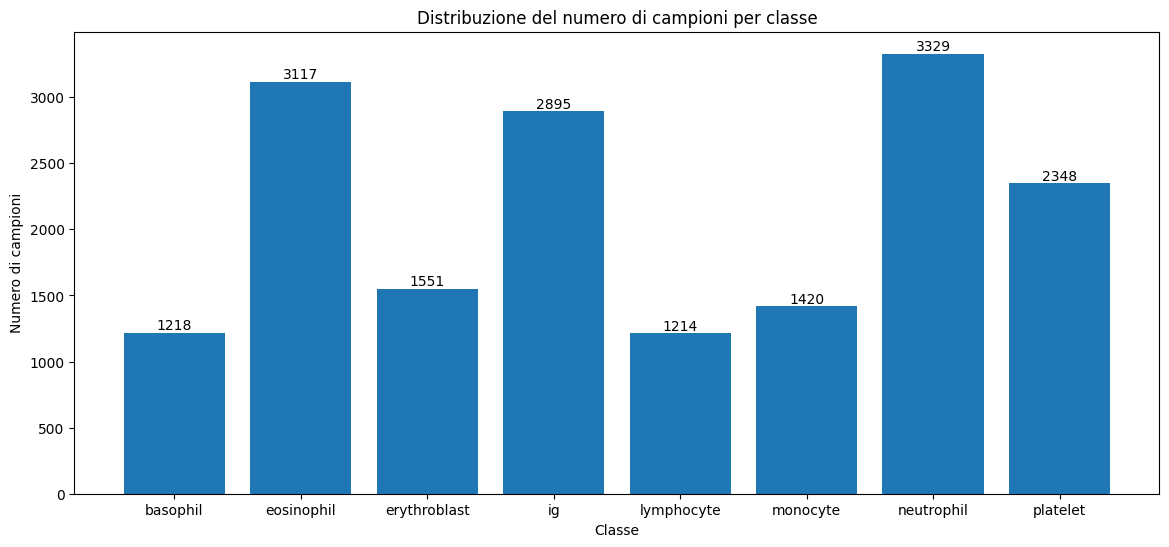

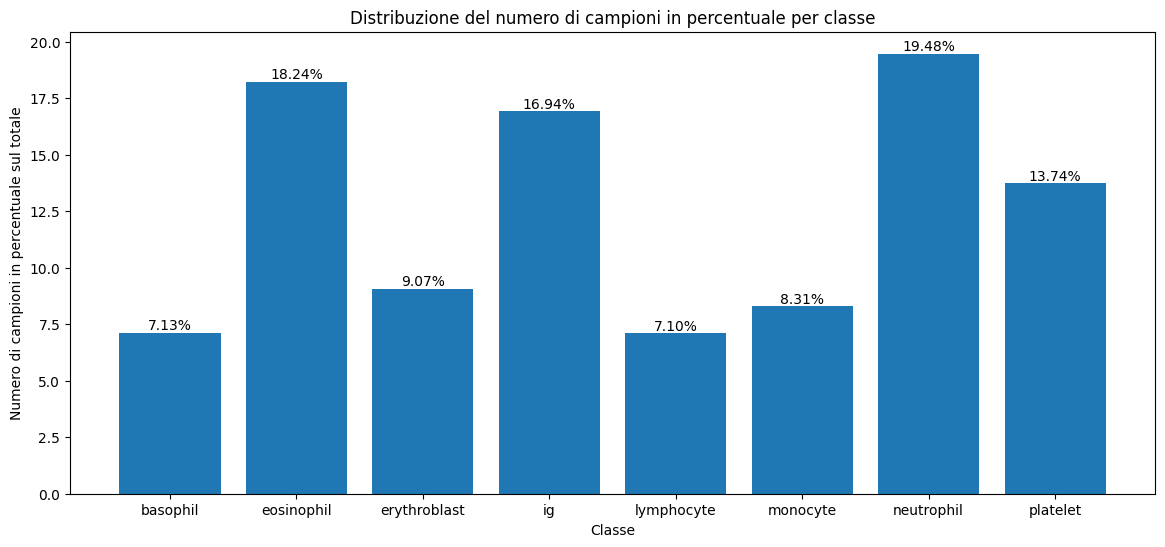

In [8]:
classes = dataset.classes
class_counts = [0]*8

for _, indx in dataset:
    class_counts[indx] += 1

plt.figure(figsize=(14, 6))
bar=plt.bar(classes, class_counts)
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Numero di campioni")
plt.title("Distribuzione del numero di campioni per classe")
plt.show()

#percentuale sul totale
for i in range(len(class_counts)):
  class_counts[i]=class_counts[i]/len(dataset)*100


plt.figure(figsize=(14, 6))
bar=plt.bar(classes, class_counts)
plt.bar_label(bar,fmt="%.2f%%")
plt.xlabel("Classe")
plt.ylabel("Numero di campioni in percentuale sul totale")
plt.title("Distribuzione del numero di campioni in percentuale per classe")
plt.show()



#Manipolazione Dati

In [37]:
from torch.utils.data import DataLoader, random_split

train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size= len(dataset)-train_size-val_size

# Split the dataset
train_dataset, val_dataset,test_dataset = random_split(dataset, [train_size, val_size,test_size])

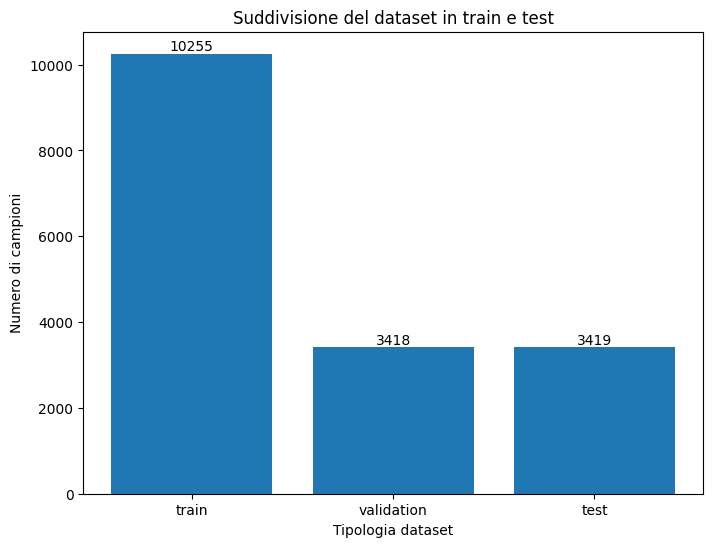

In [38]:
plt.figure(figsize=(8, 6))
bar=plt.bar(["train","validation", "test"], [len(train_dataset.indices),len(val_dataset.indices),len(test_dataset.indices)])
plt.bar_label(bar)
plt.xlabel("Tipologia dataset")
plt.ylabel("Numero di campioni")
plt.title("Suddivisione del dataset in train e test")
plt.show()

In [39]:
from torch import nn, optim
from torch.utils.data import DataLoader

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', device)

Using PyTorch version: 2.3.0+cu121  Device: cuda


In [27]:
#DataLoader
train_loader=DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader=DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader=DataLoader(test_dataset, batch_size=64, shuffle=False)

dataiter = iter(train_loader)
images, labels = next(dataiter)
print("tipologia loader: ",type(images))
print("shape immagine: ",images.shape)
print("label shape: ",labels.shape)

tipologia loader:  <class 'torch.Tensor'>
shape immagine:  torch.Size([64, 3, 64, 64])
label shape:  torch.Size([64])


In [41]:
data = []
for idx, (image, label) in enumerate(train_dataset):
    image_np = np.asarray(image)
    data.append({
        "image": image_np.flatten(),
        "label": dataset.classes[label],
    })
train_pd = pd.DataFrame(data)
train_pd = train_pd.sample(frac=1).reset_index(drop=True)

data = []
for idx, (image, label) in enumerate(val_dataset):
    image_np = np.asarray(image)
    data.append({
        "image": image_np.flatten(),
        "label": dataset.classes[label],
    })
val_pd = pd.DataFrame(data)
val_pd = val_pd.sample(frac=1).reset_index(drop=True)

data = []
for idx, (image, label) in enumerate(test_dataset):
    image_np = np.asarray(image)
    data.append({
        "image": image_np.flatten(),
        "label": dataset.classes[label],
    })
test_pd = pd.DataFrame(data)
test_pd = val_pd.sample(frac=1).reset_index(drop=True)

train_pd.head()

,image,label
0,"[0.9098039, 0.89411765, 0.8901961, 0.8862745, ...",eosinophil
1,"[0.8, 0.80784315, 0.8235294, 0.84705883, 0.913...",neutrophil
2,"[0.9882353, 0.9843137, 0.9411765, 0.84705883, ...",erythroblast
3,"[0.8, 0.7921569, 0.7882353, 0.7882353, 0.80392...",platelet
4,"[0.8235294, 0.9098039, 0.9882353, 0.9882353, 0...",platelet


In [51]:
#divisione feature
X_train_pd =train_pd["image"]
y_train_pd =train_pd["label"]

X_val_pd =val_pd["image"]
y_val_pd =val_pd["label"]

X_test_pd =test_pd["image"]
y_test_pd =test_pd["label"]


#Modello 1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
import time

model = LogisticRegression(max_iter=5,solver="sag",n_jobs=-1)

In [ ]:
scorer = make_scorer(accuracy_score)

#grid search
grid = dict()
grid['C'] = np.logspace(-3, -1, 10)
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid,cv=cv, n_jobs=-1, scoring=scorer, error_score=0)
start = time.time()
grid_result = grid_search.fit(X_train_pd.to_list(), y_train_pd)
end = time.time()
print('Grid search time =', end - start)

In [ ]:
# Summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

In [ ]:
model.fit(X_train_pd.to_list(), y_train_pd)

y_pred = model.predict(X_test_pd.to_list())

accuracy = accuracy_score(y_test_pd, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#Modello 2:

#Modello 3: DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train_pd.to_list(),y_train_pd)

y_pred = clf.predict(X_test_pd.to_list())

accuracy = accuracy_score(y_test_pd, y_pred)
print(f'Accuracy: {accuracy:.2f}')